In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model,model_selection,metrics
import cv2 as cv
import matplotlib.image as mimg
import seaborn as sns


In [2]:
path = '/content/Ecommerce Customers.csv'
data = pd.read_csv(path)
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [6]:
# print(data.feature_names)
# print(data.DESCR)
# print(data.target)
# print(data.target_names)

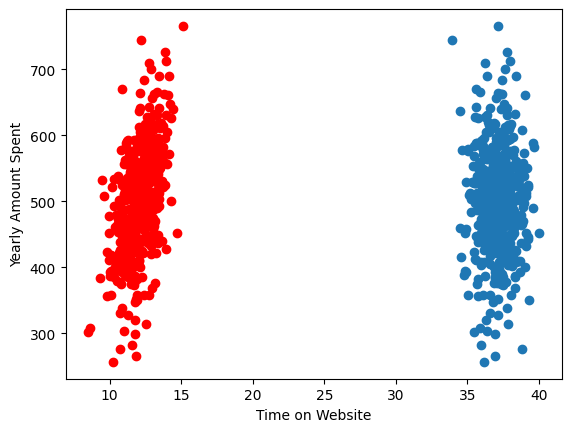

In [16]:
x = data['Time on Website']
y = data['Yearly Amount Spent']
z = data['Time on App']
plt.scatter(x, y)  # Plot the first scatter plot
plt.xlabel('Time on Website')
plt.ylabel('Yearly Amount Spent')
plt.scatter(z, y, c='r')
plt.show()

In [18]:
# Select only the numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=['float', 'int'])

# Calculate the correlation matrix
cor = numeric_data.corr()

print(cor)

                      Avg. Session Length  Time on App  Time on Website  \
Avg. Session Length              1.000000    -0.027826        -0.034987   
Time on App                     -0.027826     1.000000         0.082388   
Time on Website                 -0.034987     0.082388         1.000000   
Length of Membership             0.060247     0.029143        -0.047582   
Yearly Amount Spent              0.355088     0.499328        -0.002641   

                      Length of Membership  Yearly Amount Spent  
Avg. Session Length               0.060247             0.355088  
Time on App                       0.029143             0.499328  
Time on Website                  -0.047582            -0.002641  
Length of Membership              1.000000             0.809084  
Yearly Amount Spent               0.809084             1.000000  


<Axes: >

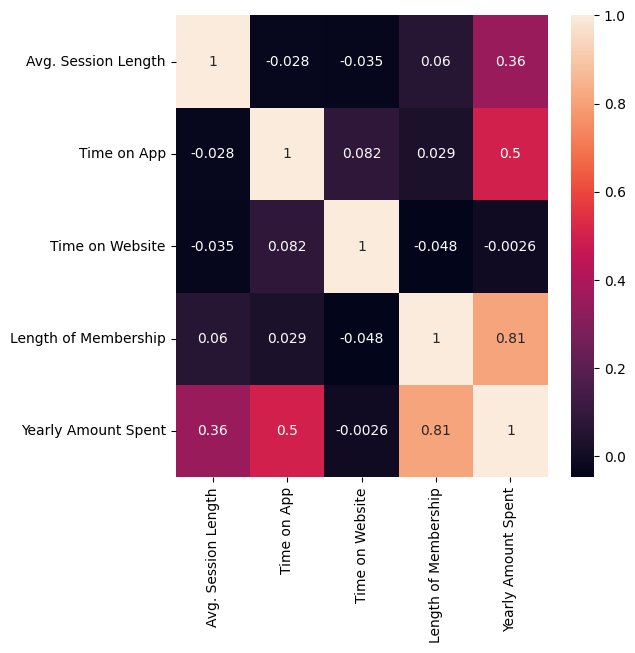

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(1,(6,6))
sns.heatmap(cor,annot=True)


<Figure size 640x480 with 0 Axes>

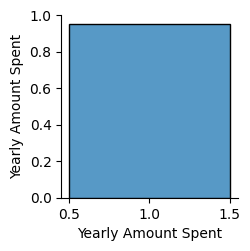

In [20]:
# Adjust column names in the drop method if needed,
# and make sure they match the output of the previous print statement exactly.
newData = numeric_data.drop(['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'], axis=1, inplace=False)
# Dropping only 4 columns to keep 'Yearly Amount Spent'

corNew = newData.corr()
plt.figure(1)
sns.pairplot(corNew, kind='reg')

In [22]:
#Now, we create the Linear Model.
#Where BMI is the Dependent Variable, and s5 is the Independent Variables.
#y=(mx+c) for reference.
X=numeric_data['Yearly Amount Spent'].values #Independent Variables.
y=numeric_data['Avg. Session Length'].values #Dependent Variables.

#If the single Independent Variable is Considered.
X=X.reshape(-1,1)
#Now, split the data into train and test.
ratio=0.3
[Xtrain,Xtest,ytrain,ytest]=model_selection.train_test_split(X,y,test_size=ratio,random_state=7)
print(Xtrain.shape,ytrain.shape)
print(Xtest.shape,ytest.shape)

(350, 1) (350,)
(150, 1) (150,)


In [23]:
#Now, Creating the Linear Model.
lnModel=linear_model.LinearRegression();
#Train the Model using the Trained Data.
lnModel=lnModel.fit(Xtrain,ytrain);
#Predict the xtrain Data.
ypredTrn=lnModel.predict(Xtrain);
#Predict the xtest Data.
ypredTst=lnModel.predict(Xtest);
#Metrics.
r2ScoreTrain =metrics.r2_score(ytrain,ypredTrn)
r2ScoreTest =metrics.r2_score(ytest,ypredTst)
print('Training r2 value:',r2ScoreTrain)
print('Testing r2 value:',r2ScoreTest)

Training r2 value: 0.13091329532573182
Testing r2 value: 0.0854373601441657


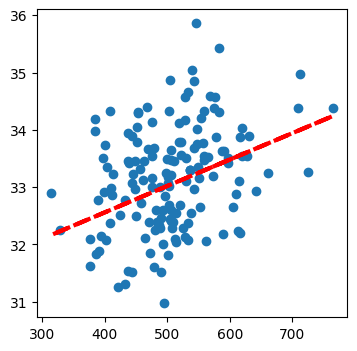

In [24]:
plt.figure(1,(4,4))
plt.scatter(Xtest,ytest)
plt.plot(Xtest,ypredTst,'--r',linewidth=3)

In [28]:
from statsmodels.tsa import seasonal,arima_model
import statsmodels.api as st
